In [2]:
import pandas as pd
from tqdm.auto import tqdm

# Compare Parameter

In [2]:
VALUE_RANK = 0 # 取percentile
VALUE_RANK_Ns = [10,20,30,40,50,60] # 取前幾名
T = 125 # 半衰期
N = 2 # PCA 成分
DAYSs = [252*1, 252*2,252*3] # PCA & PB
RANK_RESULTs = [1,2,3,4,5,6,7]


In [3]:
DF = pd.DataFrame()
for VALUE_RANK_N in tqdm(VALUE_RANK_Ns):
    for DAYS in DAYSs:
        for RANK_RESULT in RANK_RESULTs:
            df = pd.read_csv('Data2/Result/'f'daily_results_mean_{VALUE_RANK}_{VALUE_RANK_N}_{T}_{DAYS}_{RANK_RESULT}.csv', index_col = 0, )
            DF = pd.concat([DF,df], axis = 1)

100%|██████████| 6/6 [00:00<00:00, 38.20it/s]


In [4]:
DF = pd.DataFrame()
for VALUE_RANK_N in tqdm(VALUE_RANK_Ns):
    for DAYS in DAYSs:
        for RANK_RESULT in RANK_RESULTs:
            # df = pd.read_csv('Data2/Result/'f'results_mean_{VALUE_RANK}_{VALUE_RANK_N}_{T}_{DAYS}_{RANK_RESULT}.csv', index_col = 0, )
            df = pd.read_excel('Data2/Result/'f'daily_performance_{VALUE_RANK}_{VALUE_RANK_N}_{T}_{DAYS}_{RANK_RESULT}.xlsx')
            if float(df.iloc[5][0]) > 0.09:
                print(df.iloc[5][0])
                print(f'performance_{VALUE_RANK}_{VALUE_RANK_N}_{T}_{DAYS}_{RANK_RESULT}')
            DF = pd.concat([DF,df], axis = 1)

 50%|█████     | 3/6 [00:00<00:00,  9.29it/s]

0.13
performance_0_10_125_756_2


100%|██████████| 6/6 [00:00<00:00,  9.89it/s]

0.1
performance_0_40_125_756_2
0.1
performance_0_40_125_756_3
0.1
performance_0_50_125_756_2
0.1
performance_0_50_125_756_3
0.1
performance_0_60_125_756_2
0.1
performance_0_60_125_756_3


# 比較市值filter之重要性

In [11]:
# VALUE_RANKs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
VALUE_RANKs = [1]
METHODs = ['no_rank', 'rank_original', 'rank_BL', 'rank_minVol', 'rank_maxUtility', 'rank_BL_LSTM']

DF = pd.DataFrame()

count = 0
for METHOD in METHODs:
    for VALUE_RANK in VALUE_RANKs:
        # if count > 0 and METHOD == 'no_rank':
        #     continue
        # if METHOD == 'no_rank':
            # count+=1

        df = pd.read_excel('Data2/Result/'f'daily_performance_{VALUE_RANK}_{METHOD}.xlsx')
        df.columns = [f'{VALUE_RANK}_{METHOD}']
        df.iloc[0] = VALUE_RANK
        df.iloc[1] = METHOD
        DF = pd.concat([DF,df], axis = 1)

In [12]:
DF.index = ['VALUE_RANK', 'METHOD', 'Risk-Free Rate', 'Time in Market',
       'Cumulative Return', 'CAGR﹪', 'Sharpe', 'Prob. Sharpe Ratio', 'Sortino',
       'Sortino/√2', 'Omega', 'Max Drawdown', 'Longest DD Days',
       'Gain/Pain Ratio', 'Gain/Pain (1M)', 'Payoff Ratio', 'Profit Factor',
       'Common Sense Ratio', 'CPC Index', 'Tail Ratio', 'Outlier Win Ratio',
       'Outlier Loss Ratio', 'MTD', '3M', '6M', 'YTD', '1Y', '3Y (ann.)',
       '5Y (ann.)', '10Y (ann.)', 'All-time (ann.)', 'Avg. Drawdown',
       'Avg. Drawdown Days', 'Recovery Factor', 'Ulcer Index',
       'Serenity Index']

In [14]:
DF

,1_no_rank,1_rank_original,1_rank_BL,1_rank_minVol,1_rank_maxUtility,1_rank_BL_LSTM
VALUE_RANK,1,1,1,1,1,1
METHOD,no_rank,rank_original,rank_BL,rank_minVol,rank_maxUtility,rank_BL_LSTM
Risk-Free Rate,0,0,0,0,0,0
Time in Market,1,1,1,1,1,1
Cumulative Return,0.87,2.62,3.45,2.01,2.43,2.73
CAGR﹪,0.11,0.23,0.27,0.19,0.22,0.23
Sharpe,1.09,2.16,1.18,0.76,1.24,1.15
Prob. Sharpe Ratio,0.98,1,0.99,0.99,1,0.99
Sortino,1.41,3.17,1.76,1.86,2.32,1.71
Sortino/√2,1,2.24,1.24,1.31,1.64,1.21


In [13]:
DF.to_excel('Summary_Value.xlsx', index = False)

In [9]:
tmp_DF = DF[DF['METHOD'] == 'rank_BL']

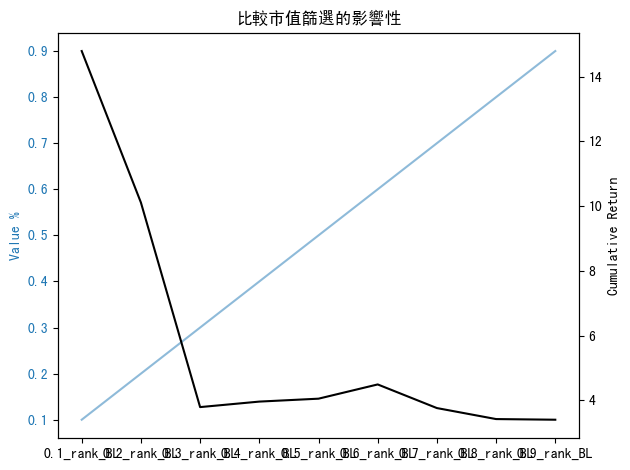

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

fig, ax1 = plt.subplots()
plt.title('比較市值篩選的影響性')
ax2 = ax1.twinx()

ax1.set_ylabel('Value %', color='tab:blue')
# ax1.fill(DF[time:].index, DF[col+'_'][time:], color='gray', alpha=0.5)
# ax1.fill_between(DF[time:].index, 0, 1, where= DF[col+'_'][time:] == 1,
#                 color='tab:blue', alpha=0.5, transform = ax1.get_xaxis_transform())
ax1.plot(tmp_DF.index, tmp_DF['VALUE_RANK'], color='tab:blue', alpha=0.5)

ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.grid(False)

ax2.set_ylabel('Cumulative Return', color='black')
# ax2.plot((1+df_strat['XLE'][time:]).index, (1+df_strat['XLE'][time:]).cumprod(), color='black', alpha = 1)
ax2.plot(tmp_DF.index, tmp_DF['Cumulative Return'], color='black', alpha = 1)
ax2.tick_params(axis='y', labelcolor='black')

# fig.convert_xunits(0.5)
fig.tight_layout()
plt.grid(False)
plt.show()